In [135]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from scipy.special import iv

%matplotlib inline

In [333]:
f = 1e-4
g = 9.81
rho_0 = 1.2e3
drho = 10
h1 = 20
h2 = 80
r_0 = 1e5
u_star = 0.1

c_2 = np.sqrt(g * drho / rho_0 * h1 * h2 / (h1 + h2))
R_2 = c_2 / f
sigma_1 = f * (R_2 / r_0)

In [332]:
np.pi/(2 * sigma_1)/6

22890.999435098653

In [343]:
r_i = np.arange(0, r_0+1, 1e2)
phi_i = np.arange(0, 2*np.pi+0.1, 0.1)
t_i = np.arange(0, np.pi/(2 * sigma_1)*4, 5e4)
r, t, phi = np.meshgrid(r_i, t_i, phi_i)

In [304]:
# Stocker and Imberger solution

C = 0.1
F = 0.1

f = 1e-4
g = 9.81
H = 100
r_0 = 1e6
c = np.sqrt(g * H)
S = c / (f * r_0)

sigma = [0, 0.08156 * S**4 - 0.44265 * S**3 + 0.90116 * S**2 + 0.97033 * S - 0.001206]

r_i = np.arange(0, 1.1, 0.1)
phi_i = np.arange(0, 2*np.pi+0.1, 0.1)
t_i = np.arange(0, np.pi/(2 * sigma[1])*4)
r, t, phi = np.meshgrid(r_i, t_i, phi_i)

a = []
A = []
D = []

for k in range(2):
    z = np.sqrt(1 - sigma[k]**2) / S
    a.append((sigma[k] - 1) / (1 + sigma[k] - sigma[k]**3 / S**2))
    A.append(iv(1, r * z * S) / iv(1, z))
    D.append(np.cos(phi - sigma[k] * tau))

W_f = g * H**2 / (F * r_0)
W_c = H / (C * r_0)
Q_f = -A[0]
Q_c = r * S - A[0]

eta_0 = (Q_c / W_c - Q_f / W_f) * np.cos(phi) - (1 / W_c - 1 / W_f) * (a[0] * D[0] * A[0])
eta_1 = (Q_c / W_c - Q_f / W_f) * np.cos(phi) - (1 / W_c - 1 / W_f) * (a[1] * D[1] * A[1])

In [344]:
# Csanady solution
A = h_2 / (h_1 + h_2) * u_star**2 / c_2**2 * r_0 * np.exp((r - r_0) / R_2)
B = np.cos(phi)
C = (1 - R_2 / r_0) * np.cos(phi - sigma_1 * t)
eta_2 = -A * C

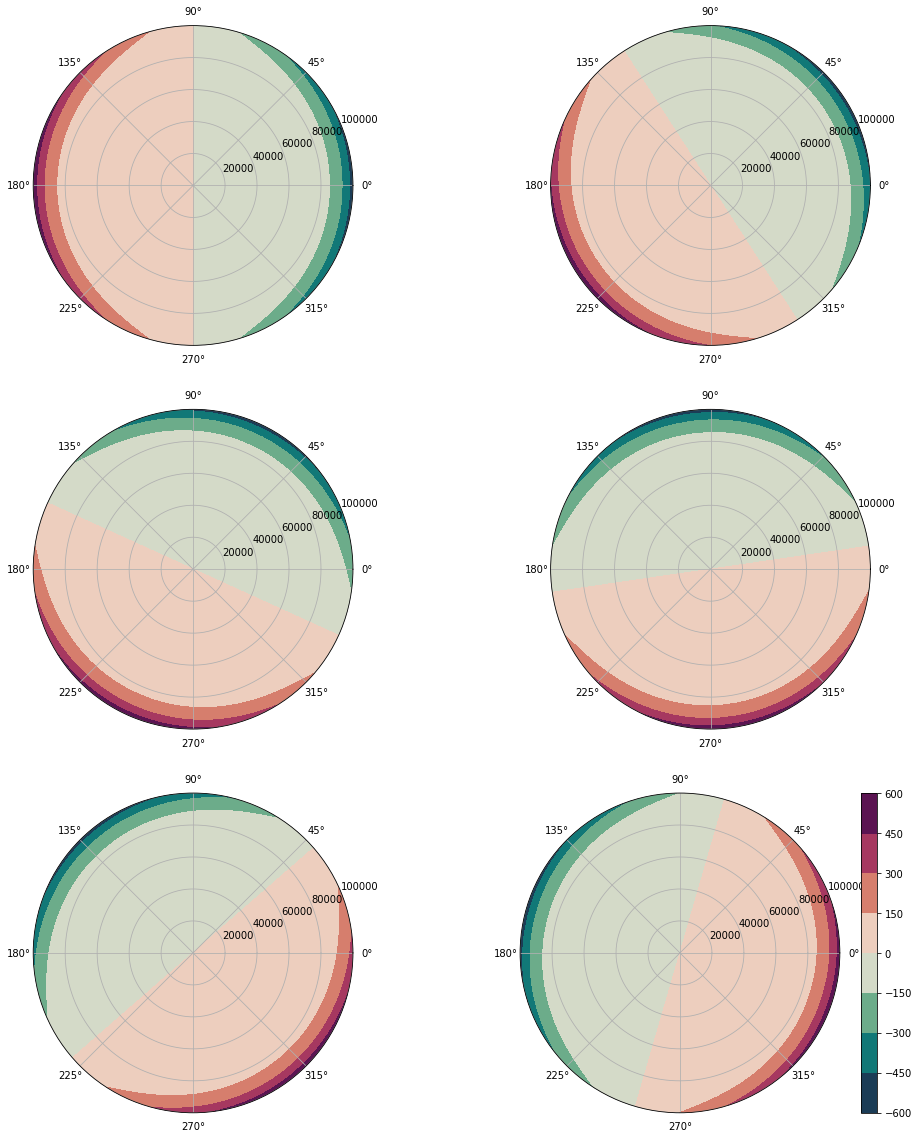

In [345]:
fig, axs = plt.subplots(3, 2, subplot_kw=dict(projection='polar'), figsize=(17, 20))
axs = axs.reshape(6)
for tt, ax in enumerate(axs):
    c = ax.contourf(phi_i, r_i, eta_2[tt, ...], cmap=cmocean.cm.curl)

fig.colorbar(c)